# Find a best market to advertise in

## Background
**This project will focus on the data from freeCodeCamp's 2017 New Coder Survey, which tells how people from diverse background (freelance, government wrokers, startup workers, etc.) learn to code and relevant fields where they want to apply their skills to, including different domains they are interested in**

# Goal:
## Find out the best market that online traning platforms should invest

## Dataset
**I found the data, which was made public in this <a href="https://github.com/fivethirtyeight/data/tree/master/fandango">repository</a>**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv")
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Use "interest" as a keyword to filter out potential columns indicates people's interest**

In [3]:
cols_=[]
for col in df.columns:
    if 'interest' in col.lower():
        cols_.append(col)
cols_

['JobInterestBackEnd',
 'JobInterestDataEngr',
 'JobInterestDataSci',
 'JobInterestDevOps',
 'JobInterestFrontEnd',
 'JobInterestFullStack',
 'JobInterestGameDev',
 'JobInterestInfoSec',
 'JobInterestMobile',
 'JobInterestOther',
 'JobInterestProjMngr',
 'JobInterestQAEngr',
 'JobInterestUX',
 'JobRoleInterest']

Generate a frequency distribution table for column "JobRoleInterest"

In [4]:
df['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                         11.770595
  Front-End Web Developer                                                                                                                                                                                         6.435927
  Data Scientist                                                                                                                                                                                                  2.173913
Back-End Web Developer                                                                                                                                                                                            2.030892
  Mobile Developer                                                                                                          

Results are kind of messy here, but it appears that<br>
- Most people are interested in web development (Full-Stack Web Developer, Back-End Web Developer....)
- Aside from Web development, it is hard to tell the popularity from other domains 

**Preprocessing the column info**

In [5]:
role_interest=df['JobRoleInterest'].dropna()
interest=role_interest.str.split(',')

#Generate a frequency table
no_of_interest=interest.apply(lambda x: len(x))
no_of_interest.value_counts(normalize=True).sort_values(ascending=False)*100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

Preliminary Conclusion:<br>

Only 31.65% of the survey participants hold strong & clear idea about the work purpose they follows to lkearn programming, while the rest of them have mixed interest

Thus, I will seperate web development from other domains to plot out the frequency, data science are included as well

True     82.608696
False    17.391304
Name: JobRoleInterest, dtype: float64


False    70.323227
True     29.676773
Name: JobRoleInterest, dtype: float64


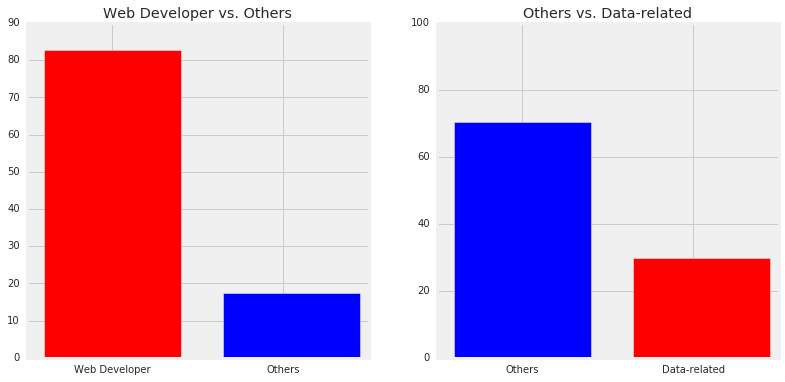

In [6]:
#Seperate 'Web Developer' and Data-related jobs for visualization
web=role_interest.str.contains('Web Developer')
data=role_interest.str.contains('Data')

#Convert results to percentage
web_perc=web.value_counts(normalize=True)*100
data_perc=data.value_counts(normalize=True)*100

print(web_perc)
print("\n")
print(data_perc)

fig=plt.figure(figsize=(12,6))

ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

bar_positions=[0.6, 1.65]

ax1.bar(data=web_perc, left=bar_positions, height=web_perc.values, color=('r','b'))
ax1.set_xticks(range(1,3))
ax1.set_xticklabels(['Web Developer', 'Others'])
ax1.set_title("Web Developer vs. Others")

              
ax2.bar(data=data_perc, left=bar_positions, height=data_perc.values,color=('b','r'))
ax2.set_xticks(range(1,3))
ax2.set_xticklabels(['Others', 'Data-related'])
ax2.set_title("Others vs. Data-related")

plt.ylim([0,100])
plt.show()

More than 80% learners amoong all who took the survey are focusing on Web Development 

## Location-wise analysis

**Find our where these neww coderes arre located, and how many coderes are there**

Drop all the rows where participants didn't answer

In [27]:
df_g=df[df['JobRoleInterest'].notnull()].copy()

In [28]:
df_g['JobRoleInterest'].isnull().sum()

0

Generate frequency table for "CountryLive" variable

In [29]:
absolute_frequency=df_g['CountryLive'].value_counts()
relative_frequency=df_g['CountryLive'].value_counts(normalize=True)*100

country_frequency=pd.DataFrame(data={'Absolute Frequency': absolute_frequency,
                                     'Relative Frequency': relative_frequency})

country_frequency

,Absolute Frequency,Relative Frequency
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


Findings:<br>
1. US shares biggest market, which is 	45.7%<br>
2. While India ranked No.2, the market share (7.7%) is a huge drop compared to US <br>
3. Top 4 countries: US, UK, India, Canada are all using english as official language


## Budget-wise analysis

**Next, find out ho much are people willing to spend on learning**

Monthly Spend Analysis

In [30]:
len(df_g[df_g['MonthsProgramming']==0])

235

In [31]:
#replace 0s in 'MonthsProgrammings' with 1s
df_g['MonthsProgramming'].replace(0,1,inplace=True)

#Calculate the amount oof money spent per month
df_g['money/month']=df_g['MoneyForLearning']/df_g['MonthsProgramming']


#Find out how many null values there are in the new column
print(df_g['money/month'].isnull().sum())

675


In [32]:
#Keep only the rows that don't have a null value for the new column
df_g=df_g[df_g['money/month'].notnull()]

#Remove any rows that have null values in 'CountryLive'
df_g=df_g[df_g['CountryLive'].notnull()]

#See how many rows are left
len(df_g)

6212

Group the remaining data by the CountryLive column and find out how much money a student spends on each month, take both median & mean into consideration

In [33]:
#Mean
country=['United States of America',
                            'India', 'United Kingdom',
                            'Canada']

monthly_spend_country=df_g.groupby('CountryLive').mean()

monthly_spend_country['money/month'][country]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money/month, dtype: float64

Money spend in UK and Canadas should be both higher than that in India given higher GDP, but they are both lower in this case.<br>

Results could be affected by outliers

## Investigate possible outliers

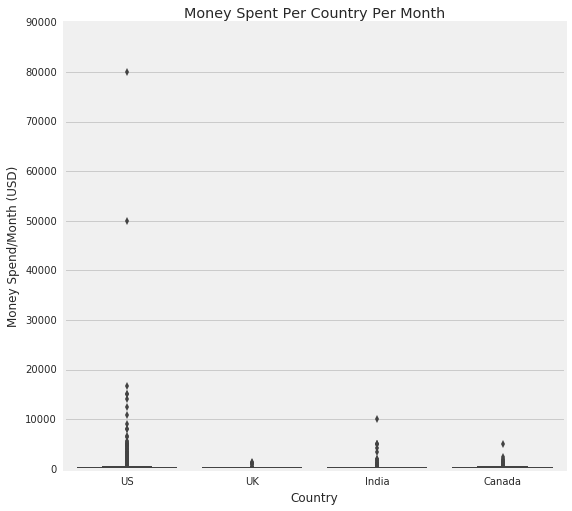

In [34]:

country=['United States of America','India', 'United Kingdom','Canada']

c_4=df_g[df_g['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

plt.figure(figsize=(8,8))

sns.boxplot(data=c_4, x='CountryLive', y='money/month')

plt.xlabel("Country")
plt.ylabel("Money Spend/Month (USD)")
plt.title("Money Spent Per Country Per Month")
plt.xticks(range(4),['US','UK','India','Canada'])
plt.ylim(0,90000)
plt.show()

There are two very unlikely figure for US, which are aboive 50k, so I will limit the range to less than 20000

In [35]:
#Exclude outliers
df_g=df_g[df_g['money/month']<20000]

#Recauculate the mean value
df_g.groupby('CountryLive').mean()['money/month'][country]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money/month, dtype: float64

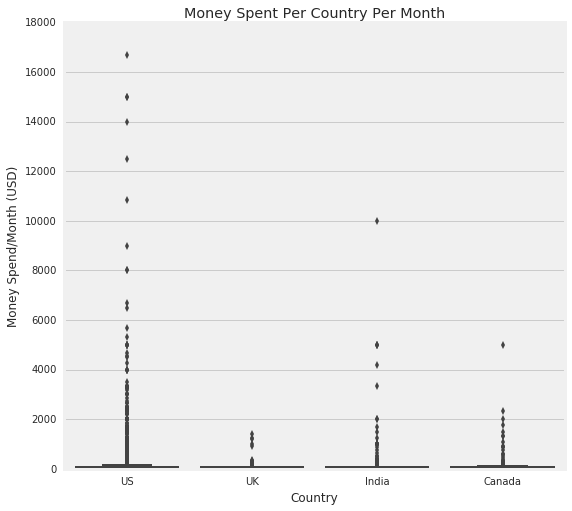

In [36]:
#replot the data again
c_4=df_g[df_g['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

plt.figure(figsize=(8,8))

sns.boxplot(data=c_4, x='CountryLive', y='money/month')

plt.xlabel("Country")
plt.ylabel("Money Spend/Month (USD)")
plt.title("Money Spent Per Country Per Month")
plt.xticks(range(4),['US','UK','India','Canada'])
#plt.ylim(0,90000)
plt.show()

**Investigate into US**

Filter out results the amount  of which are above 6000 and examine them

In [37]:
us_big=c_4[(c_4['CountryLive'] == 'United States of America') &
           (c_4['money/month'] >= 6000)]
us_big

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money/month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


Simply visualize the results

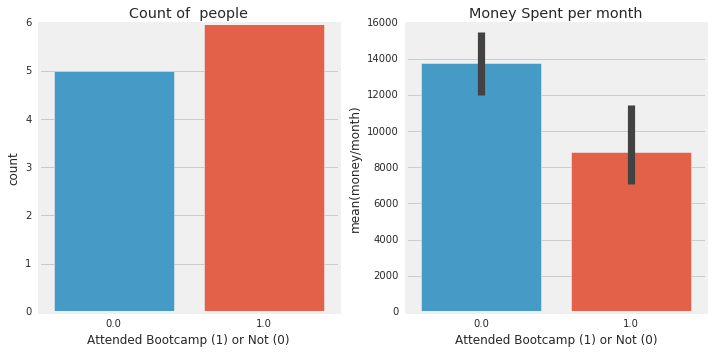

In [53]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.countplot(x='AttendedBootcamp',data=us_big,ax=ax[0])
ax[0].set_xlabel("Attended Bootcamp (1) or Not (0)")
ax[0].set_title("Count of  people")

sns.barplot(x='AttendedBootcamp',y='money/month',data=us_big,ax=ax[1])
ax[1].set_xlabel("Attended Bootcamp (1) or Not (0)")
ax[1].set_title("Money Spent per month")

plt.tight_layout()

6 people attended bootcamp, but the rest five spent more money. Check the total time they spednt on programming

In [39]:
us_outliers['MonthsProgramming']

3930      6.0
7198      5.0
16650    12.0
16997     1.0
17231     2.0
Name: MonthsProgramming, dtype: float64

Check the total time they spednt on programming

In [42]:
c_4[(c_4['CountryLive']=='United States of America') &
    (c_4['money/month']>=6000)]['MonthsProgramming']

718     1.0
1222    2.0
3184    1.0
6805    1.0
7505    3.0
9778    1.0
Name: MonthsProgramming, dtype: float64

In [43]:
#Exclude people either attended 0 bootcamp or have programmed less than 3 months
us_outliers=c_4[(c_4['CountryLive']=='United States of America') &
        (c_4['money/month']>=6000) & 
        (c_4['AttendedBootcamp']==0)&
        (c_4['MonthsProgramming']<3)]

c_4=c_4.drop(us_outliers.index)

**Investigate into India**

Judge from boxplot, most people spent around less than 2500, so i Will filter out results the amount  of which are above 6000 and examine them

In [44]:
india_big=c_4[(c_4['CountryLive'] == 'India') &
           (c_4['money/month'] >= 2500)]
india_big

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money/month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


None of these people attended bootcamp, but the cost is still relatively much higher, so it;s safer to remove these rows

In [45]:
india_outliers=c_4[(c_4['CountryLive']=='India') &
        (c_4['money/month']>=2500) & 
        (c_4['AttendedBootcamp']==0)]

c_4=c_4.drop(india_outliers.index)

**Investigate into Canada**

Judge from box plot, there is an possible outliers above 400

In [46]:
canada_big=c_4[(c_4['CountryLive'] == 'Canada') &
           (c_4['money/month'] >= 4000)]
canada_big

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money/month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This person  attended bootcamps, but given the still very big number compare to others, investigate into programming time maight be safer

In [47]:
canada_big['MonthsProgramming']

13659    2.0
Name: MonthsProgramming, dtype: float64

In [48]:
canada_big=c_4[(c_4['CountryLive']=='Canada') &
        (c_4['money/month']>=2500) & 
        (c_4['AttendedBootcamp']==0)&
        (c_4['MonthsProgramming']<3)]

c_4=c_4.drop(canada_big.index)

**Recalculate the  mean value for money spent per month**

In [50]:
c_4.groupby('CountryLive').mean()['money/month']

CountryLive
Canada                      113.510961
India                        65.758763
United Kingdom               45.534443
United States of America    160.532509
Name: money/month, dtype: float64

**Recalculate the percentage for 'CountryLive'**

In [51]:
c_4['CountryLive'].value_counts(normalize=True)*100

United States of America    74.987186
India                       11.711943
United Kingdom               7.150179
Canada                       6.150692
Name: CountryLive, dtype: float64

# Conclusion

- **US is bestr market to advertise in as majority of online learners live there, and they are willing to pay more money per month compared to other market**
- **Canada or India could be the second best choice, although learners in Canada paid  much more in the former, the latter almost doule the market proiportion**
